# **Project Name - Iris Flower Classifiaction**

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Created by -** Prashik Dhole

# ***Let's Begin !***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Irislstm.csv')

### Dataset First View

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Dataset Rows & Columns count

In [6]:
df.shape

(150, 6)

### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Missing Values/Null Values

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

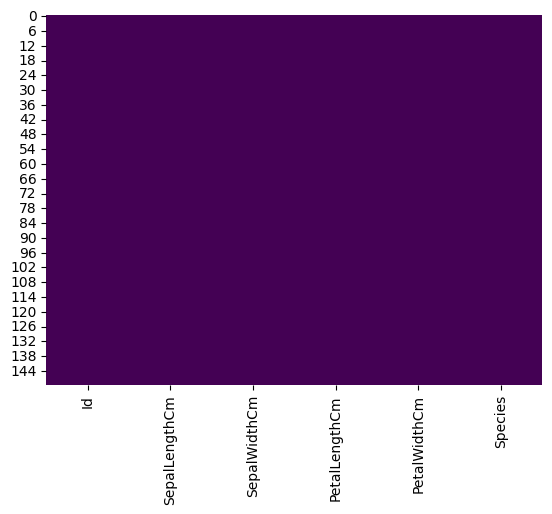

In [10]:
sns.heatmap(df.isnull(),cmap = 'viridis',cbar=False)

#What did you know about your dataset?

1.The Dataset contains 150 no.of.rows and 6 no.of.Columns.

2.No missing value present in the dataset.

## ***2. Understanding Your Variables***

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 3. ***Data Preprocessing***

In [13]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [16]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [17]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

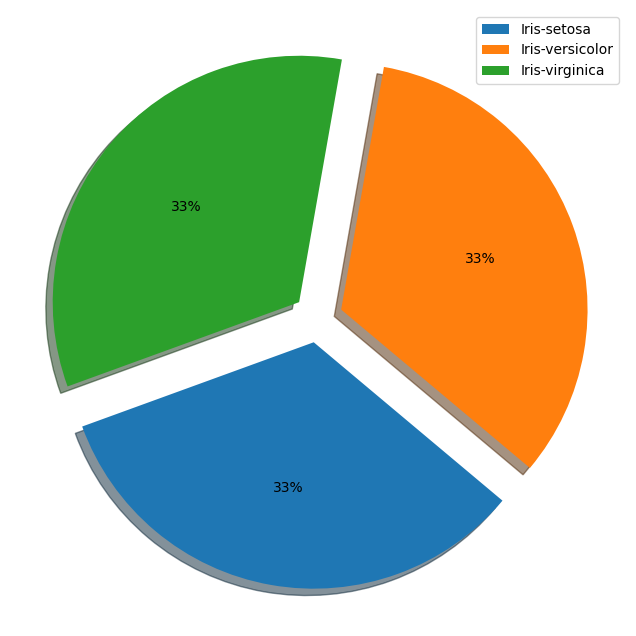

In [18]:
plt.figure(figsize=(10,8))
plt.pie(df.Species.value_counts(),autopct='%.0f%%',shadow=True,startangle = 200,explode=[0.1,0.1,0.1])
plt.legend(labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.show()

**From above dataset we get insight that the dataset contain equal number of species of flowers.**

#### Chart - 2

In [20]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

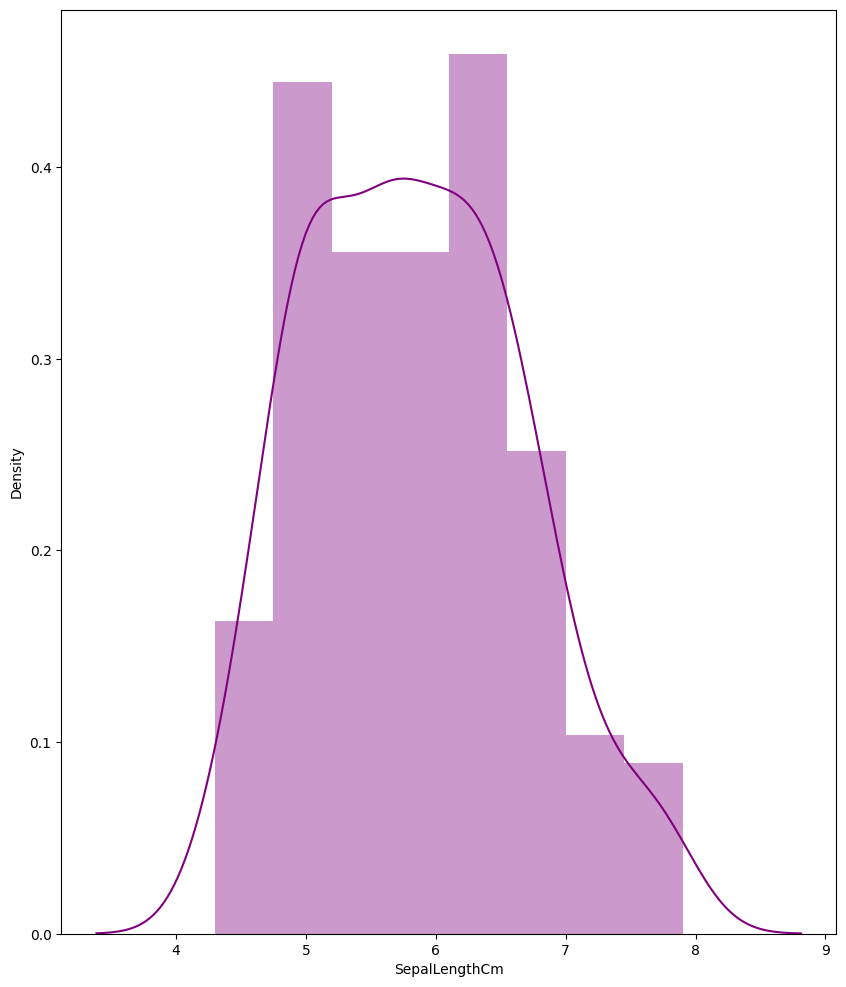

In [21]:
plt.figure(figsize=(10,12))
a=df['SepalLengthCm']
sns.distplot(a, color='purple')

**Insight**

**Maximumm value of sepal length are in the range of 5 to 7**

#### Chart - 3

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

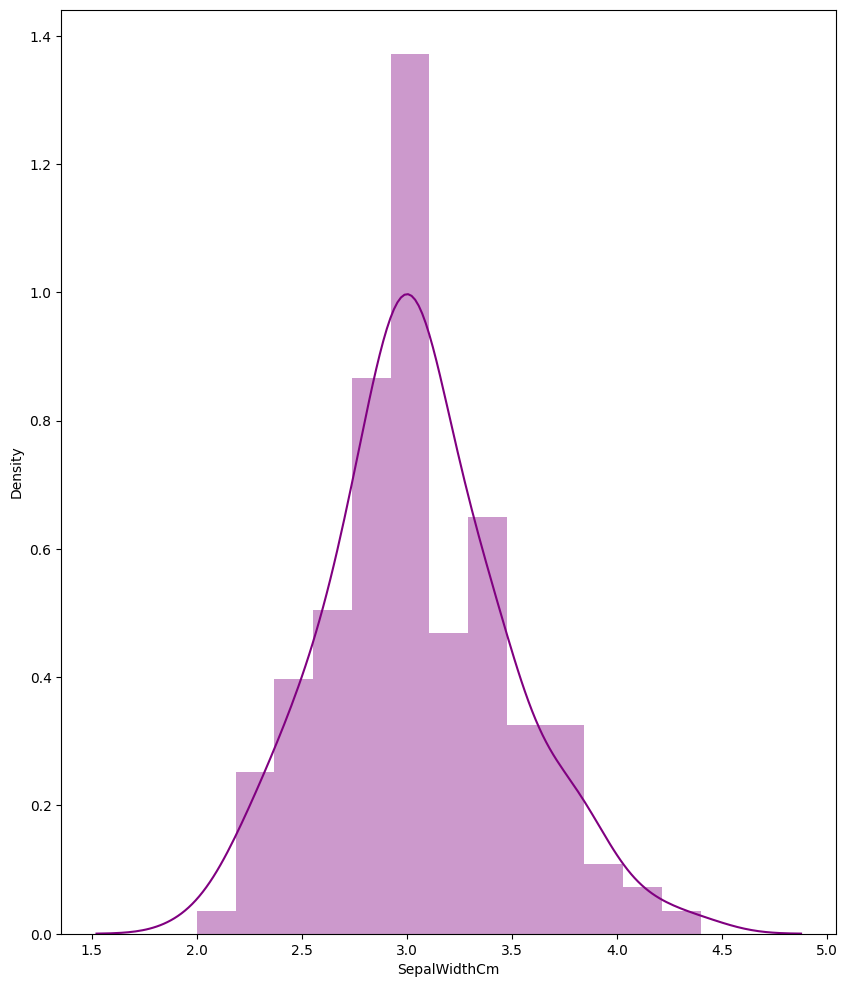

In [22]:
plt.figure(figsize=(10,12))
a=df['SepalWidthCm']
sns.distplot(a, color='purple')

**Insight**

**The sepal_width values are largely concentrated around 3**

#### Chart - 4

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

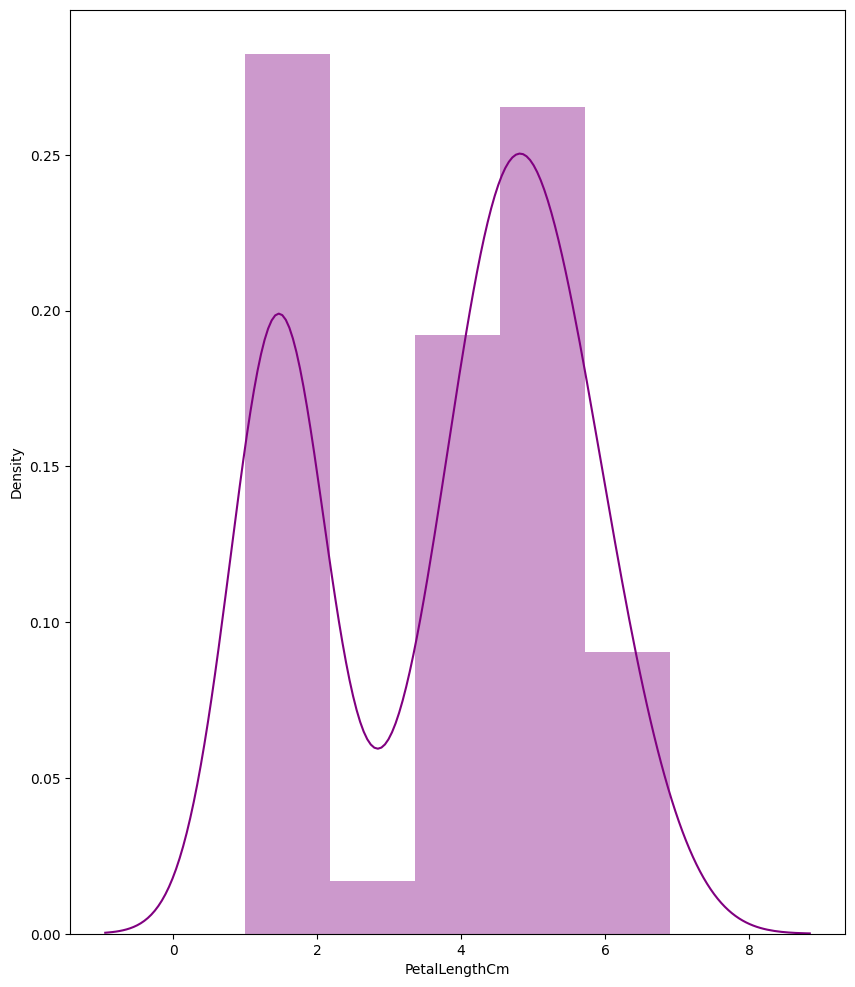

In [23]:
plt.figure(figsize=(10,12))
a=df['PetalLengthCm']
sns.distplot(a, color='purple')

**Insight**

The petal_length values are concentrated in between 1 to 2 and 4 to 6.

#### Chart - 5

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

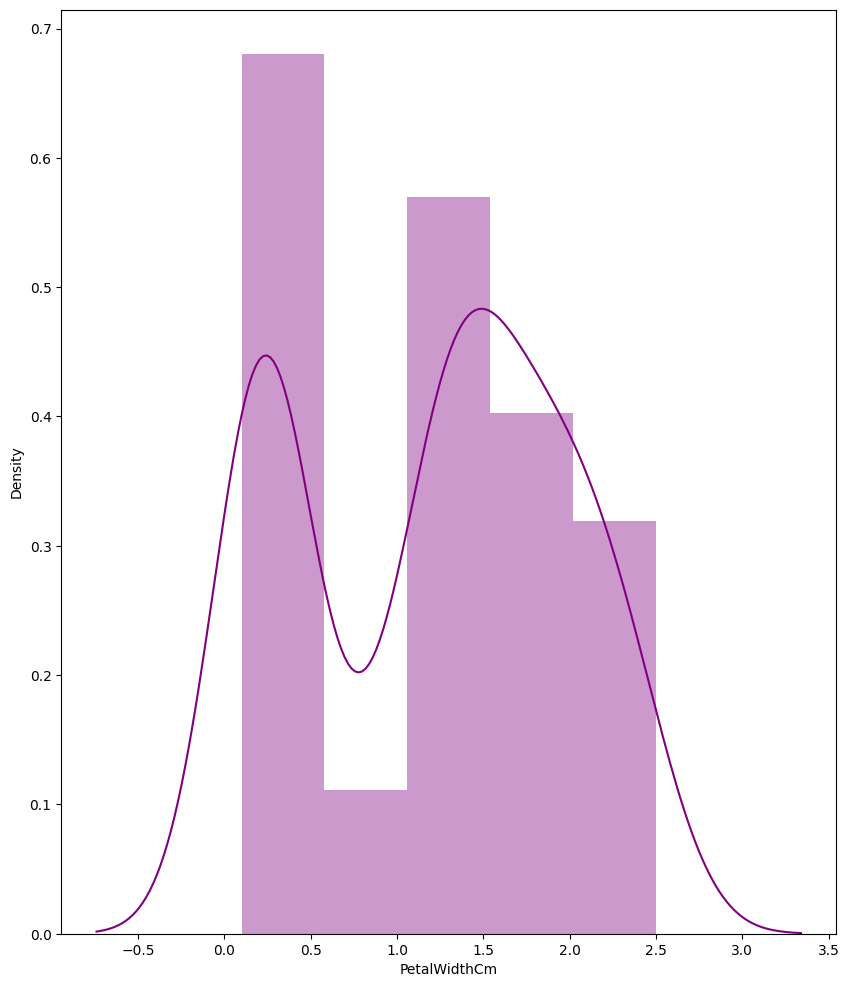

In [24]:
plt.figure(figsize=(10,12))
a=df['PetalWidthCm']
sns.distplot(a, color='purple')

**Insight**

The petal_width values are concentrated in between 0 to 0.5 and 1 to 2.5.

#### Chart - 6

<Axes: >

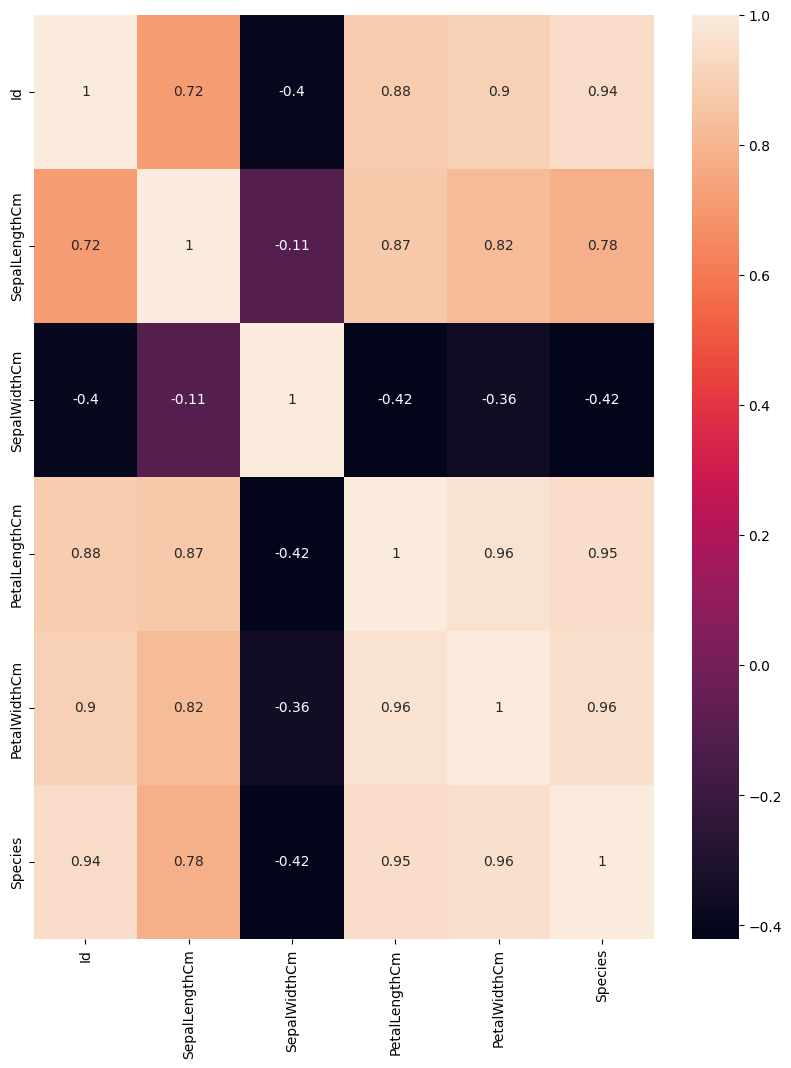

In [25]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), annot=True)

**Insight**

**We seen that species column is strongly releated to the petal width and petal length column.**

#### Chart - 7

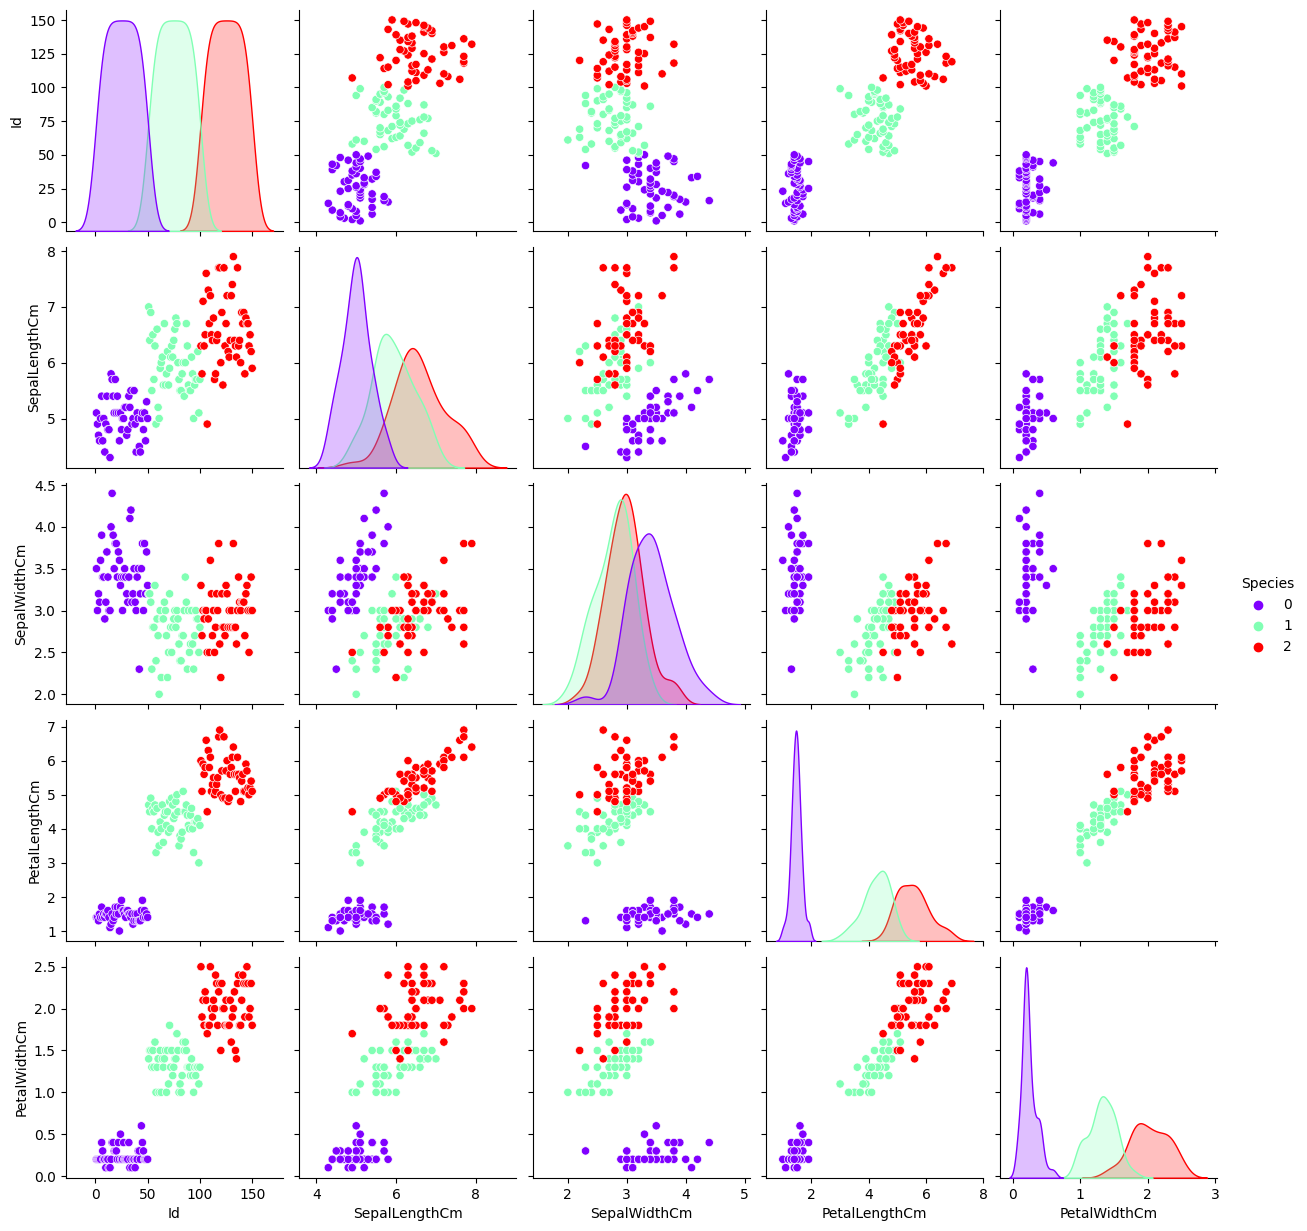

In [26]:
sns.pairplot(df, hue='Species', palette = 'rainbow')

 **Insight**

Above pairplot gives bivariate analysis. Petal length and petal width have linear relation.

## ***7. Model Building***

###Declaring the Depending and Independant variable

In [27]:
x = df.drop("Species",axis=1)
y = df["Species"]

###splitting the Data in Train and Test sets

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
x_train.shape

(112, 5)

In [30]:
x_test.shape

(38, 5)

In [31]:
y_train.shape

(112,)

In [32]:
y_test.shape

(38,)

###Fit Into the Model

In [33]:
humidity_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 10, random_state = 0)
humidity_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [34]:
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state = 0), params,verbose=1,cv=3)
grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [35]:
grid_cv.best_params_

{'max_leaf_nodes': 3, 'min_samples_split': 2}

In [36]:
best_humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3, min_samples_split = 2, random_state = 0)
best_humidity_classifier.fit(x_train,
                             y_train)
y_predict = best_humidity_classifier.predict(x_test)

In [37]:
y_predict[0:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [38]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
Name: Species, dtype: int64

###Model Evalution

In [39]:
accuracy_score(y_test,y_predict)*100

100.0

In [40]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

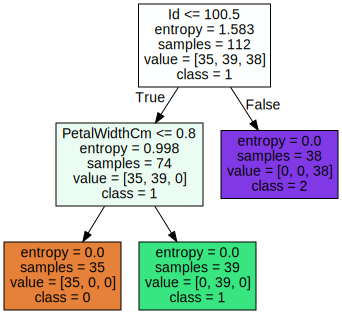

In [41]:
graph = Source(tree.export_graphviz(best_humidity_classifier,out_file=None,feature_names=x_train.columns,class_names=['0','1','2'],filled=True))
display(SVG(graph.pipe(format='svg')))